### Data Cleaning ###

**Imports**

In [1]:
import datetime as dt

import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Chicago ###

**Reading In Data**

In [2]:
#reading in city-specific data
chi_df = pd.read_csv('../data/chi_accidents.csv')

In [3]:
chi_df.head(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2749141,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,NaN,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,West,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,A-2749152,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2,A-2749158,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.,21501.0,N IL Route 59,R,Barrington,Lake,IL,60010-2456,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
chi_df.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [5]:
chi_df.shape

(42472, 47)

In [6]:
chi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42472 entries, 0 to 42471
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     42472 non-null  object 
 1   severity               42472 non-null  int64  
 2   start_time             42472 non-null  object 
 3   end_time               42472 non-null  object 
 4   start_lat              42472 non-null  float64
 5   start_lng              42472 non-null  float64
 6   end_lat                42472 non-null  float64
 7   end_lng                42472 non-null  float64
 8   distance(mi)           42472 non-null  float64
 9   description            42472 non-null  object 
 10  number                 15879 non-null  float64
 11  street                 42472 non-null  object 
 12  side                   42472 non-null  object 
 13  city                   42471 non-null  object 
 14  county                 42472 non-null  object 
 15  st

- Going to drop the column 'id' outright

**Addressing Null Counts**

In [7]:
chi_df.isna().sum().sort_values(ascending = False)[:20]
#will replace null values

number                   26593
precipitation(in)        23129
wind_chill(f)            16332
wind_speed(mph)           2024
wind_direction             310
humidity(%)                244
visibility(mi)             120
temperature(f)             119
weather_condition          116
pressure(in)                68
weather_timestamp           64
timezone                     2
airport_code                 2
nautical_twilight            1
civil_twilight               1
sunrise_sunset               1
astronomical_twilight        1
city                         1
country                      0
give_way                     0
dtype: int64

In [8]:
chi_df[['number']][0:10]
#number represents street address,
#going to drop column

,number
0,NaN
1,21500.0
2,21501.0
3,1194.0
4,7899.0
5,7899.0
6,14425.0
7,14424.0
8,970.0
9,976.0


In [9]:
#precipitation(in)
chi_df[['precipitation(in)']].value_counts().sort_index()

precipitation(in)
0.00                 16032
0.01                  1012
0.02                   483
0.03                   312
0.04                   234
                     ...  
1.06                     1
1.19                     1
1.20                     2
1.76                     1
1.95                     1
Length: 78, dtype: int64

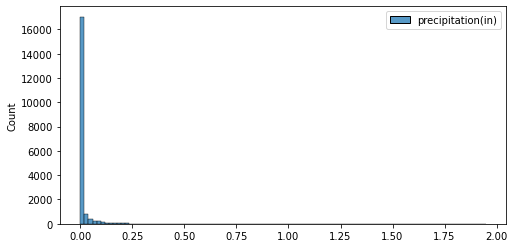

In [10]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['precipitation(in)']], bins = 100);

In [11]:
mean_precip = chi_df[['precipitation(in)']].mean()
median_precip = chi_df[['precipitation(in)']].median()

mean_precip, median_precip
#setting precipitation(in) nulls to median

(precipitation(in)    0.011642
 dtype: float64,
 precipitation(in)    0.0
 dtype: float64)

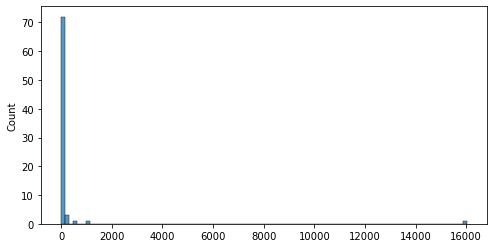

In [12]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['precipitation(in)']].value_counts().sort_index(), bins = 100);

In [13]:
chi_df[['wind_chill(f)']].value_counts().sort_index()

wind_chill(f)
-51.3             1
-50.5             1
-50.1             1
-48.5             1
-47.7             1
                 ..
 91.0            32
 92.0            35
 93.0            29
 94.0            26
 95.0             4
Length: 694, dtype: int64

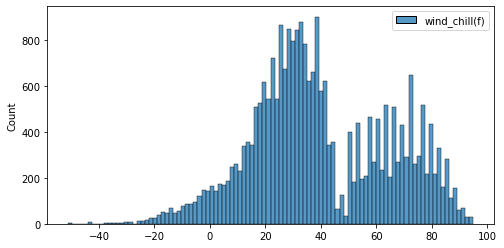

In [14]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_chill(f)']], bins = 100);

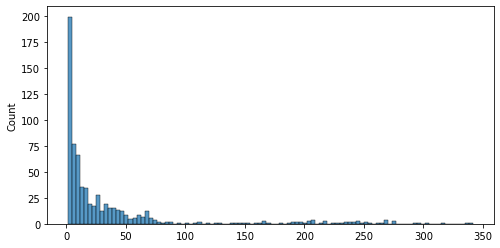

In [15]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_chill(f)']].value_counts().sort_values(), bins = 100);

In [16]:
mean_wind_chill = chi_df[['wind_chill(f)']].mean()
median_wind_chill = chi_df[['wind_chill(f)']].median()

mean_wind_chill, median_wind_chill
#setting wind_chill nulls to temperature(f)

(wind_chill(f)    39.650593
 dtype: float64,
 wind_chill(f)    35.25
 dtype: float64)

In [17]:
#wind_speed(mph)
chi_df[['wind_speed(mph)']].value_counts().sort_index()[0::5]

wind_speed(mph)
0.0                1079
5.8                2260
8.1                2549
11.5               2168
14.0                784
17.3                704
20.7                256
24.0                 46
26.5                 47
29.9                 13
32.2                  4
38.0                  1
dtype: int64

In [18]:
mean_wind_speed = chi_df[['wind_speed(mph)']].mean()
median_wind_speed = chi_df[['wind_speed(mph)']].median()

mean_wind_speed, median_wind_speed
#setting precipitation(in) nulls to median

(wind_speed(mph)    10.003125
 dtype: float64,
 wind_speed(mph)    9.2
 dtype: float64)

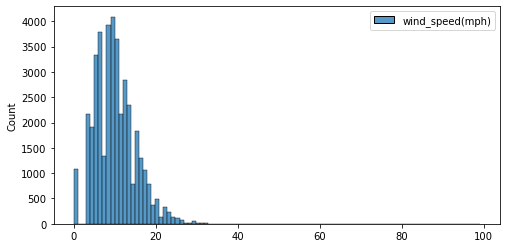

In [19]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_speed(mph)']], bins = 100);

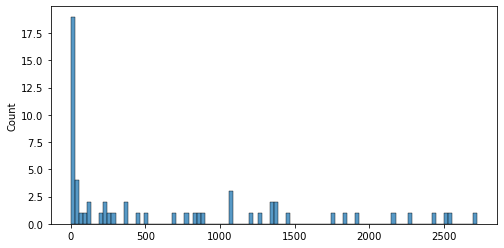

In [20]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['wind_speed(mph)']].value_counts().sort_index(), bins = 100);

In [21]:
#for frame of reference:
chi_df.isna().sum().sort_values(ascending = False)[:18]

number                   26593
precipitation(in)        23129
wind_chill(f)            16332
wind_speed(mph)           2024
wind_direction             310
humidity(%)                244
visibility(mi)             120
temperature(f)             119
weather_condition          116
pressure(in)                68
weather_timestamp           64
timezone                     2
airport_code                 2
nautical_twilight            1
civil_twilight               1
sunrise_sunset               1
astronomical_twilight        1
city                         1
dtype: int64

In [22]:
#wind_direction
chi_df[['wind_direction']].value_counts(ascending = False)

#going to get dummies for this variable, including the nulls

wind_direction
SSW               3110
West              2968
WSW               2767
SW                2546
South             2419
WNW               2412
NNE               2356
NE                2119
NW                2036
ENE               1979
NNW               1699
Calm              1658
North             1647
SSE               1645
East              1597
SE                1500
ESE               1485
W                 1295
S                 1190
E                 1190
CALM              1079
N                  609
Variable           579
VAR                277
dtype: int64

In [23]:
#https://stackoverflow.com/questions/44231598/python-pandas-get-dataframe-value-counts-result-as-list

#making dictionary of weather_conditions
chi_df['wind_direction'].value_counts()
chi_wind = chi_df['wind_direction'].value_counts()
chi_wind_dict = dict(chi_wind)

#creating values and labels for pieplot
chi_wind_names = chi_wind_dict.keys()
chi_wind_values = chi_wind_dict.values()

In [24]:
#Colors for pie charts:
#https://stackoverflow.com/questions/21034830/how-can-i-generate-more-colors-on-pie-chart-matplotlib
import random
import matplotlib.colors as mcolors

colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = 25)

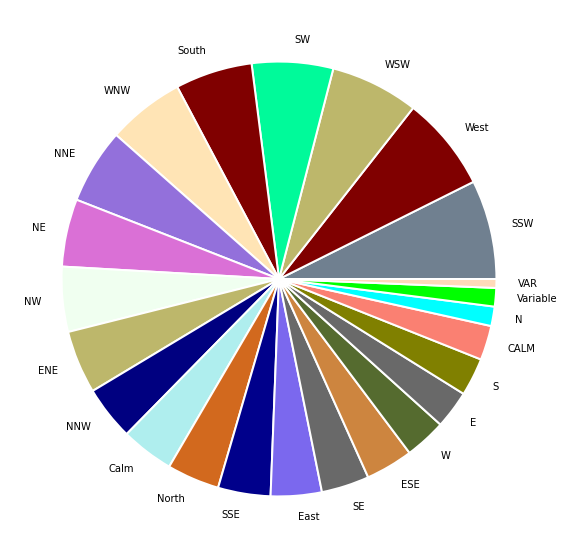

In [25]:
#https://www.python-graph-gallery.com/pie-plot-matplotlib-basic
plt.rcParams["figure.figsize"] = (10, 10)

# Create a pieplot
plt.pie(chi_wind_values, labels = chi_wind_names, colors = colors, 
        labeldistance = 1.1, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' });
plt.show()

In [26]:
#'humidity(%)'
chi_df[['humidity(%)']].value_counts().sort_index()

humidity(%)
6.0              1
13.0             2
14.0             1
16.0             4
17.0             2
              ... 
96.0           755
97.0           460
98.0            66
99.0            89
100.0          945
Length: 88, dtype: int64

In [27]:
mean_humid = chi_df[['humidity(%)']].mean() 
median_humid = chi_df[['humidity(%)']].median()

mean_humid, median_humid
#setting humidity(%) nulls to median

(humidity(%)    67.334375
 dtype: float64,
 humidity(%)    68.0
 dtype: float64)

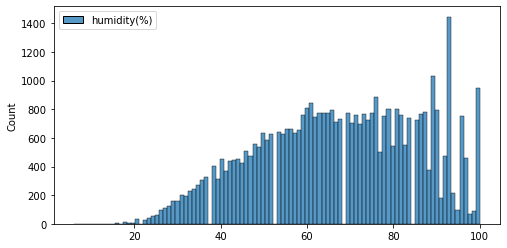

In [28]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['humidity(%)']], bins = 100);

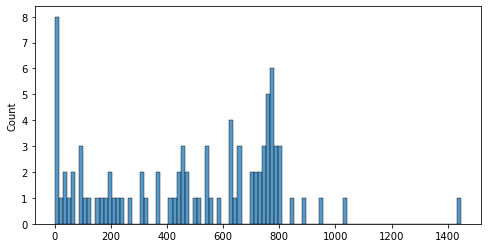

In [29]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['humidity(%)']].value_counts().sort_index(), bins = 100);

In [30]:
#'visibility(mi)'
chi_df[['visibility(mi)']].value_counts().sort_index()[0::2]

visibility(mi)
0.0                 12
0.1                 24
0.2                100
0.5                199
0.8                142
1.1                  4
1.5                228
2.0                625
3.0                795
5.0               1061
7.0               1296
9.0               1278
12.0                 9
20.0                64
dtype: int64

In [31]:
mean_vis = chi_df[['visibility(mi)']].mean()
median_vis = chi_df[['visibility(mi)']].median()

mean_vis, median_vis
#setting visibility(mi) nulls to median

(visibility(mi)    8.896925
 dtype: float64,
 visibility(mi)    10.0
 dtype: float64)

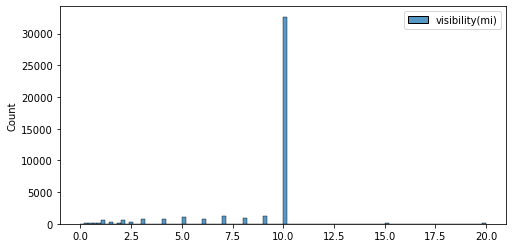

In [32]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['visibility(mi)']], bins = 100);

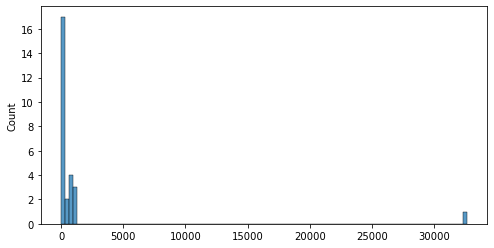

In [33]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['visibility(mi)']].value_counts().sort_index(), bins = 100);

In [34]:
#temperature(f)
chi_df[['temperature(f)']].value_counts().sort_index()

temperature(f)
-22.4              1
-21.1              1
-20.9              4
-20.2              1
-20.0              2
                  ..
 93.9             21
 94.0             26
 95.0             13
 96.1              2
 168.8             1
Length: 558, dtype: int64

In [35]:
mean_temp = chi_df[['temperature(f)']].mean()
median_temp = chi_df[['temperature(f)']].median()

mean_temp, median_temp
#setting temperature(f) nulls to median

(temperature(f)    53.024249
 dtype: float64,
 temperature(f)    53.1
 dtype: float64)

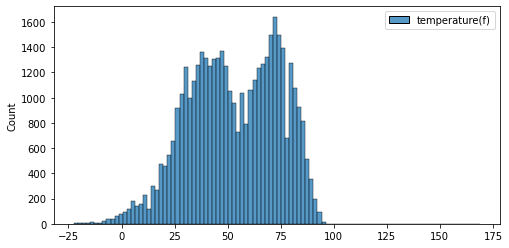

In [36]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['temperature(f)']], bins = 100);

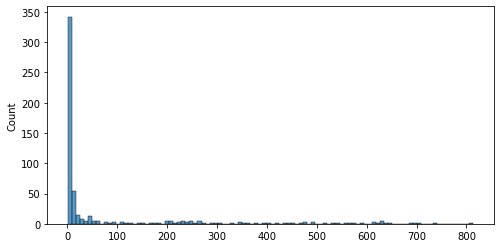

In [37]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['temperature(f)']].value_counts().sort_index(), bins = 100);

In [38]:
#for frame of reference:
chi_df.isna().sum().sort_values(ascending = False)[:12]

number               26593
precipitation(in)    23129
wind_chill(f)        16332
wind_speed(mph)       2024
wind_direction         310
humidity(%)            244
visibility(mi)         120
temperature(f)         119
weather_condition      116
pressure(in)            68
weather_timestamp       64
timezone                 2
dtype: int64

In [39]:
#top 20 frequent weather conditions:
chi_df[['weather_condition']].value_counts()[:20]

#getting dummies for this variable, including the nulls

weather_condition           
Clear                           6931
Mostly Cloudy                   6876
Overcast                        6509
Fair                            5160
Partly Cloudy                   4574
Cloudy                          3447
Scattered Clouds                2374
Light Rain                      2193
Light Snow                      1610
Haze                             357
Rain                             341
Fog                              292
Light Drizzle                    242
Fair / Windy                     130
Mostly Cloudy / Windy            122
Cloudy / Windy                   114
Snow                             108
Light Thunderstorms and Rain     108
Heavy Rain                        94
Light Rain with Thunder           77
dtype: int64

In [40]:
#making dictionary of weather_conditions
chi_df['weather_condition'].value_counts()[:20]
chi_weather = chi_df['weather_condition'].value_counts()[:20]
chi_weather_dict = dict(chi_weather)

#creating values and labels for pieplot
chi_weather_names = chi_weather_dict.keys()
chi_weather_values = chi_weather_dict.values()

#Colors for pie charts
colors = random.choices(list(mcolors.CSS4_COLORS.values()), k = 20)

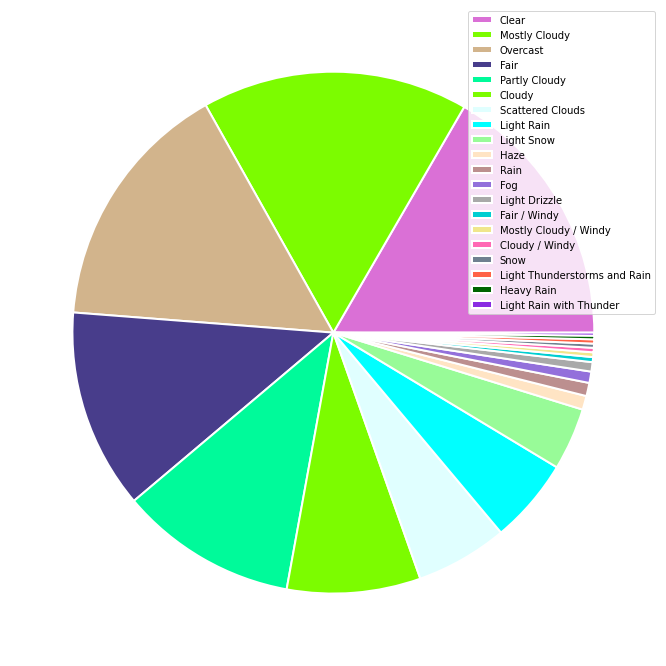

In [41]:
plt.rcParams["figure.figsize"] = (12, 12)

# Create a pieplot
plt.pie(chi_weather_values, labels = chi_weather_names, colors = colors, 
        labeldistance = None, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' });
plt.legend(loc = 0)
plt.show();

In [42]:
#pressure
chi_df[['pressure(in)']].value_counts().sort_index()

pressure(in)
20.41           1
28.54           1
28.59           2
28.60           1
28.61           1
               ..
30.83           9
30.84           4
30.86           1
30.91           2
30.96           1
Length: 230, dtype: int64

In [43]:
mean_pres = chi_df[['pressure(in)']].mean()
median_pres = chi_df[['pressure(in)']].median()

mean_pres, median_pres 
#setting pressure(in) nulls to median

(pressure(in)    29.768081
 dtype: float64,
 pressure(in)    29.88
 dtype: float64)

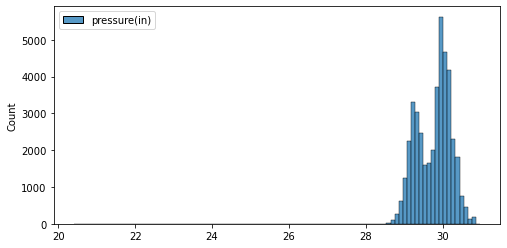

In [44]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['pressure(in)']], bins = 100);

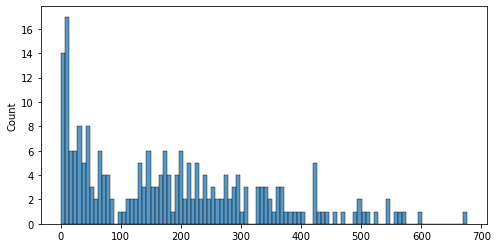

In [45]:
plt.figure(figsize = (8, 4))
sns.histplot(chi_df[['pressure(in)']].value_counts().sort_index(), bins = 100);

In [46]:
#weather_timestamp
chi_df[['weather_timestamp']].value_counts().sort_index()

#going to drop nas from chi_df['weather_timestap']

weather_timestamp  
2016-06-17 14:51:00    5
2016-06-17 14:52:00    1
2016-06-17 14:53:00    1
2016-06-17 15:52:00    1
2016-06-17 15:53:00    3
                      ..
2020-12-31 17:15:00    1
2020-12-31 17:35:00    1
2020-12-31 19:45:00    5
2020-12-31 20:52:00    4
2020-12-31 21:55:00    2
Length: 27922, dtype: int64

In [47]:
#checking null counts
chi_df.isna().sum().sort_values(ascending = False)

number                   26593
precipitation(in)        23129
wind_chill(f)            16332
wind_speed(mph)           2024
wind_direction             310
humidity(%)                244
visibility(mi)             120
temperature(f)             119
weather_condition          116
pressure(in)                68
weather_timestamp           64
timezone                     2
airport_code                 2
nautical_twilight            1
civil_twilight               1
sunrise_sunset               1
astronomical_twilight        1
city                         1
country                      0
give_way                     0
start_time                   0
end_time                     0
start_lat                    0
turning_loop                 0
traffic_signal               0
traffic_calming              0
stop                         0
station                      0
roundabout                   0
railway                      0
no_exit                      0
junction                     0
crossing

- Due to the small instances of null values in the following columns I'm going to dropna:
    - city
    - sunrise_sunset
    - astronomical_twilight
    - nautical_twilight
    - civil_twilight

**Addressing non-date Objects**

In [48]:
#Consider dropping all of 'street', 'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone', 'airport_code'

In [49]:
#sunrise_sunset
chi_df[['sunrise_sunset']].value_counts()

sunrise_sunset
Day               28772
Night             13699
dtype: int64

In [50]:
#civil_twilight
chi_df[['civil_twilight']].value_counts()

civil_twilight
Day               30767
Night             11704
dtype: int64

In [51]:
#civil_twilight
chi_df[['nautical_twilight']].value_counts()

nautical_twilight
Day                  32932
Night                 9539
dtype: int64

In [52]:
#astronomical_twilight
chi_df[['astronomical_twilight']].value_counts()

astronomical_twilight
Day                      34700
Night                     7771
dtype: int64

In [53]:
obj_cols = ['sunrise_sunset', 'civil_twilight',
            'nautical_twilight', 'astronomical_twilight']
for col in obj_cols:
    chi_df[col] = chi_df[col].replace({'Day': 0,
                                       'Night': 1})

In [54]:
chi_df['sunrise_sunset'].value_counts()

0.0    28772
1.0    13699
Name: sunrise_sunset, dtype: int64

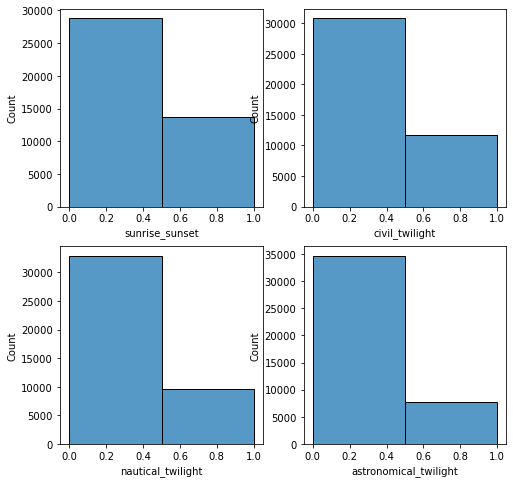

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

sns.histplot(data = chi_df, x = 'sunrise_sunset', bins = 2, ax = ax[0, 0])
sns.histplot(data = chi_df, x = 'civil_twilight', bins = 2, ax = ax[0,1])
sns.histplot(data = chi_df, x = 'nautical_twilight', bins = 2, ax = ax[1,0])
sns.histplot(data = chi_df, x = 'astronomical_twilight', bins = 2, ax = ax[1,1]);

- Going to get dummies for these variables, including the nulls

**Looking At Categorical Variables** 

In [56]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
chi_df.select_dtypes('O').head(3)

,id,start_time,end_time,description,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,wind_direction,weather_condition
0,A-2749141,2016-11-30 14:46:48,2016-11-30 20:46:48,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,West,Overcast
1,A-2749152,2016-11-30 14:58:59,2016-11-30 20:58:59,At US-14/Northwest Hwy - Accident.,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,West,Overcast
2,A-2749158,2016-11-30 15:14:24,2016-11-30 21:29:48,Between IL-22 and US-14/Northwest Hwy - Accident.,N IL Route 59,R,Barrington,Lake,IL,60010-2456,US,US/Central,KPWK,2016-11-30 14:52:00,West,Overcast


In [57]:
chi_df.select_dtypes('O').columns

Index(['id', 'start_time', 'end_time', 'description', 'street', 'side', 'city',
       'county', 'state', 'zipcode', 'country', 'timezone', 'airport_code',
       'weather_timestamp', 'wind_direction', 'weather_condition'],
      dtype='object')

In [58]:
chi_df_for_nlp = chi_df[['severity', 'description']]
chi_df_for_nlp.head(3)

,severity,description
0,2,Between IL-137/Buckley Rd/Peterson Rd and IL-1...
1,2,At US-14/Northwest Hwy - Accident.
2,3,Between IL-22 and US-14/Northwest Hwy - Accident.


In [59]:
chi_df_for_nlp.to_csv('../data/chi_df_for_nlp.csv', index=False)

**Addressing the datetime Variables**

- Going to convert datetime variables into integers via epoch time

In [60]:
#https://www.unixtimestamp.com/index.php
chi_df[['start_time', 'end_time', 'weather_timestamp']].head(3)

,start_time,end_time,weather_timestamp
0,2016-11-30 14:46:48,2016-11-30 20:46:48,2016-11-30 14:55:00
1,2016-11-30 14:58:59,2016-11-30 20:58:59,2016-11-30 14:52:00
2,2016-11-30 15:14:24,2016-11-30 21:29:48,2016-11-30 14:52:00


In [61]:
chi_df[['start_time', 'end_time', 'weather_timestamp']].dtypes

#going to convert these columns to numbers/floats
##https://stackoverflow.com/questions/35630098/convert-a-column-of-datetimes-to-epoch-in-python

start_time           object
end_time             object
weather_timestamp    object
dtype: object

- Going to feature engineer a column 'accident_duration' that's the difference between start_time and end_time

In [62]:
#for frame of reference
chi_df.head(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2749141,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,NaN,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,West,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,0.0,0.0,0.0,0.0
1,A-2749152,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,0.0,0.0,0.0,0.0
2,A-2749158,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.,21501.0,N IL Route 59,R,Barrington,Lake,IL,60010-2456,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,0.0,0.0,0.0,0.0


In [63]:
chi_df['crossing'].value_counts()

False    40043
True      2429
Name: crossing, dtype: int64

In [64]:
bool_cols = ['amenity','bump','crossing','give_way','junction','no_exit','railway','roundabout','station','stop','traffic_calming','traffic_signal','turning_loop']
for col in bool_cols:
    chi_df[col] = chi_df[col].astype('int')

In [65]:
chi_df.head()

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2749141,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,Between IL-137/Buckley Rd/Peterson Rd and IL-1...,NaN,N Milwaukee Ave,R,Libertyville,Lake,IL,60048,US,US/Central,KUGN,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,West,8.1,NaN,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0
1,A-2749152,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,At US-14/Northwest Hwy - Accident.,21500.0,N IL Route 59,L,Barrington,Lake,IL,60010-2457,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0
2,A-2749158,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,Between IL-22 and US-14/Northwest Hwy - Accident.,21501.0,N IL Route 59,R,Barrington,Lake,IL,60010-2456,US,US/Central,KPWK,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,West,15.0,NaN,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0
3,A-2749175,3,2016-11-30 16:13:53,2016-11-30 22:13:53,41.860591,-87.992749,41.860590,-87.992700,0.003,At CR-25/Meyers Rd/Westmore-Meyers Rd - Accident.,1194.0,Westmore Meyers Rd,R,Lombard,Dupage,IL,60148-4777,US,US/Central,KORD,2016-11-30 16:08:00,37.0,30.4,76.0,29.61,10.0,WSW,9.2,NaN,Overcast,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0
4,A-2749188,3,2016-11-30 16:33:05,2016-11-30 22:33:05,41.750330,-87.663440,41.750330,-87.663440,0.000,At Ashland Ave - Accident.,7899.0,S Ashland Ave,L,Chicago,Cook,IL,60620-4253,US,US/Central,KMDW,2016-11-30 16:39:00,37.9,30.0,73.0,29.65,10.0,SW,12.7,0.0,Overcast,0,0,0,0,0,0,0,0,1,0,0,1,0,1.0,0.0,0.0,0.0


In [66]:
chi_df['crossing'].value_counts()

0    40043
1     2429
Name: crossing, dtype: int64

**Writing a Cleaning Function**

In [67]:
chi_df.dtypes

id                        object
severity                   int64
start_time                object
end_time                  object
start_lat                float64
start_lng                float64
end_lat                  float64
end_lng                  float64
distance(mi)             float64
description               object
number                   float64
street                    object
side                      object
city                      object
county                    object
state                     object
zipcode                   object
country                   object
timezone                  object
airport_code              object
weather_timestamp         object
temperature(f)           float64
wind_chill(f)            float64
humidity(%)              float64
pressure(in)             float64
visibility(mi)           float64
wind_direction            object
wind_speed(mph)          float64
precipitation(in)        float64
weather_condition         object
amenity   

In [68]:
#example for frame of reference:
list(chi_df.select_dtypes('object').columns)

['id',
 'start_time',
 'end_time',
 'description',
 'street',
 'side',
 'city',
 'county',
 'state',
 'zipcode',
 'country',
 'timezone',
 'airport_code',
 'weather_timestamp',
 'wind_direction',
 'weather_condition']

In [69]:
#for frame of reference:
chi_df.isna().sum().sort_values(ascending = False)

number                   26593
precipitation(in)        23129
wind_chill(f)            16332
wind_speed(mph)           2024
wind_direction             310
humidity(%)                244
visibility(mi)             120
temperature(f)             119
weather_condition          116
pressure(in)                68
weather_timestamp           64
timezone                     2
airport_code                 2
nautical_twilight            1
civil_twilight               1
sunrise_sunset               1
astronomical_twilight        1
city                         1
country                      0
give_way                     0
start_time                   0
end_time                     0
start_lat                    0
turning_loop                 0
traffic_signal               0
traffic_calming              0
stop                         0
station                      0
roundabout                   0
railway                      0
no_exit                      0
junction                     0
crossing

In [70]:
chi_df['weather_condition'].value_counts().sort_values()

Light Thunderstorms and Snow       1
Light Drizzle / Windy              1
Blowing Snow                       1
Snow / Windy                       1
Squalls                            1
Light Rain Showers                 1
Squalls / Windy                    1
Patches of Fog                     1
Light Snow and Sleet / Windy       2
Wintry Mix / Windy                 2
T-Storm / Windy                    2
N/A Precipitation                  2
Heavy Drizzle                      2
Freezing Rain                      2
Light Freezing Rain / Windy        3
Heavy T-Storm / Windy              3
Heavy Rain / Windy                 4
Smoke                              5
Light Freezing Fog                 6
Rain / Windy                       8
Light Ice Pellets                  9
Heavy Snow                        10
Mist                              18
Light Freezing Drizzle            20
Drizzle                           23
Heavy T-Storm                     26
Thunder                           26
T

In [100]:
#made by MS with the advice of JF:
def defn_weather_cols(dataframe):
    dataframe['weather_condition_Clear'] = dataframe['weather_condition_Clear'] + \
                                        dataframe['weather_condition_Fair'] + \
                                        dataframe['weather_condition_Fair / Windy'] + \
                                        dataframe['weather_condition_N/A Precipitation']

    dataframe['weather_condition_Cloudy'] = dataframe['weather_condition_Cloudy'] + \
                                        dataframe['weather_condition_Cloudy / Windy'] + \
                                        dataframe['weather_condition_Mostly Cloudy'] + \
                                        dataframe['weather_condition_Mostly Cloudy / Windy']

    dataframe['weather_condition_Fog'] = dataframe['weather_condition_Fog'] + \
                                        dataframe['weather_condition_Haze'] + \
                                        dataframe['weather_condition_Smoke']

    dataframe['weather_condition_Heavy Rain'] = dataframe['weather_condition_Heavy Rain'] + \
                                            dataframe['weather_condition_Heavy Rain / Windy'] + \
                                            dataframe['weather_condition_Heavy Drizzle'] + \
                                            dataframe['weather_condition_Squalls'] + \
                                            dataframe['weather_condition_Squalls / Windy']

    dataframe['weather_condition_Light_Drizzle'] = dataframe['weather_condition_Light Drizzle'] + \
                                                dataframe['weather_condition_Light Drizzle / Windy']

    dataframe['weather_condition_Light Freezing Rain'] = dataframe['weather_condition_Light Freezing Rain'] + \
                                                        dataframe['weather_condition_Light Freezing Rain / Windy']

    dataframe['weather_condition_Light Rain'] = dataframe['weather_condition_Light Rain'] + \
                                            dataframe['weather_condition_Light Rain / Windy']

    dataframe['weather_condition_Light Snow'] = dataframe['weather_condition_Light Snow'] + \
                                            dataframe['weather_condition_Light Snow / Windy']

    dataframe['weather_condition_Light Snow and Sleet / Windy'] = dataframe['weather_condition_Light Snow and Sleet / Windy'] + \
                                                                dataframe['weather_condition_Wintry Mix'] + \
                                                                dataframe['weather_condition_Wintry Mix / Windy']

    dataframe['weather_condition_Partly Cloudy'] = dataframe['weather_condition_Partly Cloudy'] + \
                                                dataframe['weather_condition_Partly Cloudy / Windy'] + \
                                                dataframe['weather_condition_Scattered Clouds']

    dataframe['weather_condition_Rain'] = dataframe['weather_condition_Rain'] + \
                                        dataframe['weather_condition_Rain / Windy'] + \
                                        dataframe['weather_condition_Drizzle']

    dataframe['weather_condition_Snow'] = dataframe['weather_condition_Snow'] + \
                                        dataframe['weather_condition_Snow / Windy']

    dataframe['weather_condition_Thunderstorms and Rain'] = dataframe['weather_condition_Thunderstorms and Rain'] + \
                                                        dataframe['weather_condition_Thunderstorm'] + \
                                                        dataframe['weather_condition_T-Storm / Windy'] + \
                                                        dataframe['weather_condition_Heavy T-Storm'] + \
                                                        dataframe['weather_condition_Heavy T-Storm / Windy'] + \
                                                        dataframe['weather_condition_Heavy Thunderstorms and Rain']

    dataframe['weather_condition_Light Rain with Thunder'] = dataframe['weather_condition_Light Rain with Thunder'] + dataframe['weather_condition_Light Thunderstorms and Rain']

    dataframe['weather_condition_Thunder'] = dataframe['weather_condition_Thunder'] + dataframe['weather_condition_Thunder in the Vicinity']

    weather_drop = ['weather_condition_Fair','weather_condition_Fair / Windy','weather_condition_N/A Precipitation',
                    'weather_condition_Cloudy / Windy','weather_condition_Mostly Cloudy','weather_condition_Haze',
                    'weather_condition_Smoke','weather_condition_Heavy Rain / Windy','weather_condition_Heavy Drizzle',
                    'weather_condition_Squalls','weather_condition_Squalls / Windy','weather_condition_Light Drizzle / Windy',
                    'weather_condition_Light Freezing Rain / Windy','weather_condition_Light Rain / Windy','weather_condition_Light Snow / Windy',
                    'weather_condition_Wintry Mix','weather_condition_Wintry Mix / Windy','weather_condition_Partly Cloudy / Windy',
                    'weather_condition_Scattered Clouds','weather_condition_Rain / Windy','weather_condition_Drizzle',
                    'weather_condition_Snow / Windy','weather_condition_Thunderstorm','weather_condition_T-Storm / Windy',
                    'weather_condition_Heavy T-Storm','weather_condition_Heavy T-Storm / Windy','weather_condition_Heavy Thunderstorms and Rain',
                    'weather_condition_Light Thunderstorms and Rain','weather_condition_Thunder in the Vicinity']

    dataframe = dataframe.drop(columns = weather_drop)
    
    return dataframe

In [101]:
def mrclean(dataframe):
    
    #dropping unnecessary:
    dataframe = dataframe.drop(columns = ['id', 'description', 'number', 'street', 'city', 'county',
                                          'state', 'zipcode', 'country', 'timezone', 'airport_code'])
    
    
    #converting to datetime:
    dataframe['start_time'] = pd.to_datetime(dataframe['start_time'])
    dataframe['end_time'] = pd.to_datetime(dataframe['end_time'])
    dataframe['weather_timestamp'] = pd.to_datetime(dataframe['weather_timestamp'])

    #creating epoch time categories:
    dataframe['start_time_ep'] = (dataframe['start_time'] - dt.datetime(1970,1,1))
    dataframe['start_time_ep'] = [date.total_seconds() for date in dataframe['start_time_ep']]
    
    dataframe['end_time_ep'] = (dataframe['end_time'] - dt.datetime(1970,1,1))
    dataframe['end_time_ep'] = [date.total_seconds() for date in dataframe['end_time_ep']]
    
    dataframe['weather_timestamp_ep'] = (dataframe['weather_timestamp'] - dt.datetime(1970,1,1))
    dataframe['weather_timestamp_ep'] = [date.total_seconds() for date in dataframe['weather_timestamp_ep']]
    
    
    #dropping nas from datetime:
    dataframe = dataframe.dropna(subset = ['start_time', 'end_time', 'weather_timestamp'])
    
    
    #dealing with dates/times:
    dataframe['year'] = [int(date.strftime('%Y')) for date in dataframe['start_time']] # accident year
    dataframe['month'] = [int(date.strftime('%m')) for date in dataframe['start_time']] # accident year
    dataframe['week'] = [int(date.strftime('%U')) for date in dataframe['start_time']] # accident week of the year (week 0 is the days before the first sunday of the year)
    dataframe['day'] = [date.strftime('%A') for date in dataframe['start_time']] # accident day of the week
    dataframe['hour'] = [date.strftime('%H') for date in dataframe['start_time']] # 0 through 23, 24-hour cycle
    
    
    #creating duration variable:
    dataframe['accident_duration'] = dataframe['end_time'] - dataframe['start_time']
    dataframe['accident_duration'] = [date.total_seconds() for date in dataframe['accident_duration']]
    
    
    #dropping original start_time/end_time variables:
    dataframe.drop(columns = ['start_time', 'end_time', 'weather_timestamp'], inplace = True)
    
    
    #before dealing with object dtypes I need to address 'N's and 'North's in 'wind_direction':
    dataframe['wind_direction'].replace({
        'North': 'N',
        'South': 'S',
        'West' : 'W',
        'East' : 'E',
        'Calm' : 'CALM',
        'Variable': 'VAR'
    }, inplace = True)
    
    
    #also need to address instances of the same weather condition in 'weather condition',
    #only addressing some:
#     dataframe['weather_condition'].replace({
#         'Patches of Fog': 'Fog', 
#         'Light Rain Showers': 'Light Rain',
#         'T-Storm': 'Thunderstorm',
#     }, inplace = True)
    
    
    #dealing with object dtypes:
    dataframe = pd.get_dummies(dataframe, columns = list(dataframe.select_dtypes('object').columns), dummy_na = True)
    dataframe = defn_weather_cols(dataframe)
    
    dataframe = dataframe.drop(columns = ['side_nan', 'wind_direction_nan', 'weather_condition_nan', 'day_nan', 'hour_nan'])
    
    #dealing with booleans:
    ##https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe
    dataframe[dataframe.select_dtypes('bool').columns] = dataframe.select_dtypes('bool').astype(int)
    
    
    #fill appropriate null values:
    dataframe['precipitation(in)'] = dataframe['precipitation(in)'].fillna(0)
    dataframe['wind_chill(f)'] = dataframe['wind_chill(f)'].fillna(dataframe['temperature(f)'])
    dataframe['wind_speed(mph)'] = dataframe['wind_speed(mph)'].fillna(dataframe['wind_speed(mph)'].mean())
    dataframe['humidity(%)'] = dataframe['humidity(%)'].fillna(dataframe['humidity(%)'].mean())
    dataframe['temperature(f)'] = dataframe['temperature(f)'].fillna(dataframe['temperature(f)'].mean())

    
    #dropping null values:
    dataframe = dataframe.dropna()
    
    
    #dropping duplicate rows:
    dataframe.drop_duplicates(inplace = True)
    
    
    #any additional feature engineering:

    return dataframe

In [102]:
#applying mrclean
chi_df = mrclean(chi_df)
chi_df

KeyError: "['id' 'description' 'number' 'street' 'city' 'county' 'state' 'zipcode'\n 'country' 'timezone' 'airport_code'] not found in axis"

In [74]:
chi_df.columns[35:53]

Index(['week', 'accident_duration', 'side_L', 'side_R', 'wind_direction_CALM',
       'wind_direction_E', 'wind_direction_ENE', 'wind_direction_ESE',
       'wind_direction_N', 'wind_direction_NE', 'wind_direction_NNE',
       'wind_direction_NNW', 'wind_direction_NW', 'wind_direction_S',
       'wind_direction_SE', 'wind_direction_SSE', 'wind_direction_SSW',
       'wind_direction_SW'],
      dtype='object')

In [75]:
#saving new, cleaned dataframe
chi_df.to_csv('../data/chi_df_cleaned.csv', index = False)

**Cleaning the Other Cities' Data**

- Atlanta

In [76]:
#reading in Atlanta
atl_df = pd.read_csv('../data/atl_accidents.csv')

In [77]:
atl_df.head(3)

,id,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),description,number,street,side,city,county,state,zipcode,country,timezone,airport_code,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_direction,wind_speed(mph),precipitation(in),weather_condition,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2749192,3,2016-11-30 17:35:55,2016-11-30 23:35:55,32.83752,-83.64864,32.840424,-83.646307,0.242,At US-41-BR/Forsyth St/Exit 164 - Accident.,NaN,I-75 N,R,Macon,Bibb,GA,31201,US,US/Eastern,KMCN,2016-11-30 17:53:00,66.0,NaN,90.0,29.79,4.0,West,9.2,0.24,Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Day,Day,Day
1,A-2749196,2,2016-11-30 17:39:56,2016-11-30 23:39:56,33.74153,-84.41434,33.746580,-84.430340,0.983,Between Ashby St/Exit 55 and Langhorn St/Exit ...,NaN,GA-402 W,R,Atlanta,Fulton,GA,30310,US,US/Eastern,KATL,2016-11-30 17:46:00,62.6,NaN,100.0,29.80,8.0,West,9.2,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2,A-2749218,2,2016-11-30 18:09:52,2016-12-01 00:09:52,33.91220,-84.38390,33.911380,-84.372580,0.652,At US-19/Roswell Rd/Exit 25 - Accident.,NaN,I-285 E,R,Atlanta,Fulton,GA,30342,US,US/Eastern,KPDK,2016-11-30 18:04:00,63.0,NaN,90.0,29.80,10.0,West,9.2,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Day,Day


In [78]:
atl_df.shape

(26114, 47)

In [79]:
atl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26114 entries, 0 to 26113
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     26114 non-null  object 
 1   severity               26114 non-null  int64  
 2   start_time             26114 non-null  object 
 3   end_time               26114 non-null  object 
 4   start_lat              26114 non-null  float64
 5   start_lng              26114 non-null  float64
 6   end_lat                26114 non-null  float64
 7   end_lng                26114 non-null  float64
 8   distance(mi)           26114 non-null  float64
 9   description            26114 non-null  object 
 10  number                 4337 non-null   float64
 11  street                 26114 non-null  object 
 12  side                   26114 non-null  object 
 13  city                   26114 non-null  object 
 14  county                 26114 non-null  object 
 15  st

In [80]:
atl_df.isna().sum().sort_values(ascending = False)[0:12]

number               21777
precipitation(in)    12311
wind_chill(f)        11852
wind_speed(mph)       3164
humidity(%)            509
temperature(f)         481
pressure(in)           398
visibility(mi)         378
wind_direction         378
weather_condition      365
weather_timestamp      326
station                  0
dtype: int64

In [94]:
#applying mrclean
atl_df = mrclean(atl_df)
atl_df

KeyError: 'weather_condition_Light Snow and Sleet / Windy'

In [ ]:
atl_df.isna().sum().sort_values(ascending = False)

In [ ]:
#saving new, cleaned dataframe
atl_df.to_csv('../data/atl_df_cleaned.csv', index = False)

- Boston

In [ ]:
#reading in Boston
bos_df = pd.read_csv('../data/bos_accidents.csv')

In [ ]:
bos_df.head(3)

In [ ]:
bos_df.shape

In [ ]:
bos_df.info()

In [ ]:
bos_df.isna().sum().sort_values(ascending = False)[0:12]

In [ ]:
#applying mrclean
bos_df = mrclean(bos_df)
bos_df

In [ ]:
bos_df.isna().sum().sort_values(ascending = False)

In [ ]:
#saving new, cleaned dataframe
bos_df.to_csv('../data/bos_df_cleaned.csv', index = False)

- Denver

In [ ]:
#reading in Denver
dia_df = pd.read_csv('../data/dia_accidents.csv')

In [ ]:
dia_df.head()

In [ ]:
dia_df.shape

In [ ]:
dia_df.info()

In [ ]:
dia_df.isna().sum().sort_values(ascending = False)[0:20]

In [ ]:
#applying mrclean
dia_df = mrclean(dia_df)
dia_df

In [ ]:
dia_df.isna().sum().sort_values(ascending = False)

In [ ]:
#saving new, cleaned dataframe
dia_df.to_csv('../data/dia_df_cleaned.csv', index = False)